# Обработка дат, вычисление количества новостей на дату

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots

### Интерфакс

In [2]:
df_interfax = pd.read_csv('interfax_parsed_data.csv', index_col=0)

In [3]:
df_interfax

,website,section,url,header,body,date,tags
0,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879448,Банки РФ с 2023 года начнут выходить из регуля...,Москва. 1 января. INTERFAX.RU - Банк России с ...,"07:03, 1 января 2023","['Россия', 'банки', 'послабления', 'отмена']"
1,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879447,Запрет на раскрытие информации для банков в РФ...,Москва. 1 января. INTERFAX.RU - Банк России пр...,"06:23, 1 января 2023","['Россия', 'банки', 'отчетность', 'раскрытие']"
2,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879440,Расширен перечень налоговых льгот для резидент...,Москва. 1 января. INTERFAX.RU - Резиденты росс...,"05:08, 1 января 2023","['Россия', 'налоги', 'ставки', 'САР']"
3,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879436,С 1 января будет взиматься пошлина при экспорт...,Москва. 1 января. INTERFAX.RU - Пошлина при эк...,"04:10, 1 января 2023","['Россия', 'топливо', 'демпфер', 'пошлина']"
4,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879434,Пошлина на экспорт подсолнечного масла из РФ в...,На шрот - вырастет почти в 23 раза\nМосква. 1 ...,"04:05, 1 января 2023","['Россия', 'экспорт', 'масло', 'пошлина']"
...,...,...,...,...,...,...,...
14681,Интерфакс,ЭКОНОМИКА,https://www.interfax.ru/business/927264,"""Русал"" договорился о покупке 30% китайского п...","Москва. 24 октября. INTERFAX.RU - ""Русал"" дого...","09:01, 24 октября 2023","['Китай', 'Николаев', 'Русал', 'Хэбэй', 'Гвине..."
14682,Интерфакс,ЭКОНОМИКА,https://www.interfax.ru/business/927259,"Курс доллара на ""Мосбирже"" утром опускался ниж...",Москва. 24 октября. INTERFAX.RU - Курсы доллар...,"08:31, 24 октября 2023","['Brent', 'WTI', 'НДПИ', 'Мосбиржа']"
14683,Интерфакс,ЭКОНОМИКА,https://www.interfax.ru/business/927258,"Brent подорожала до $90,3 за баррель после пад...",Москва. 24 октября. INTERFAX.RU - Котировки не...,"08:27, 24 октября 2023","['Brent', 'WTI', 'Ливан', 'ХАМАС', 'Хезболла',..."
14684,Интерфакс,ЭКОНОМИКА,https://www.interfax.ru/business/927255,Рубль незначительно изменился к доллару и юаню...,Москва. 24 октября. INTERFAX.RU - Доллар США и...,"07:07, 24 октября 2023",['Московская биржа']


In [4]:
months = {"января": "1", "февраля": "2", "марта": "3", "апреля": "4", "мая": "5", "июня": "6", "июля":"7", "августа":"8", "сентября":"9", "октября":"10"}
def monthconvert(date):
    for word, initial in months.items():
        date = date.replace(word.lower(), initial)
    return date

In [5]:
from datetime import datetime, timedelta

In [6]:
def datechanger(date):
    date = monthconvert(date)
    datetime_object = datetime.strptime(date, '%H:%M, %d %m %Y')
    return datetime_object

In [7]:
for i in range(len(df_interfax)):
    df_interfax['date'][i] = datechanger(df_interfax['date'][i])

In [8]:
df_interfax['datetime'] = df_interfax['date']

In [9]:
dates = []
for i in range(len(df_interfax)):
    dates.append(datetime.date(df_interfax['datetime'][i]))
df_interfax['date'] = dates

In [10]:
df_interfax

,website,section,url,header,body,date,tags,datetime
0,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879448,Банки РФ с 2023 года начнут выходить из регуля...,Москва. 1 января. INTERFAX.RU - Банк России с ...,2023-01-01,"['Россия', 'банки', 'послабления', 'отмена']",2023-01-01 07:03:00
1,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879447,Запрет на раскрытие информации для банков в РФ...,Москва. 1 января. INTERFAX.RU - Банк России пр...,2023-01-01,"['Россия', 'банки', 'отчетность', 'раскрытие']",2023-01-01 06:23:00
2,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879440,Расширен перечень налоговых льгот для резидент...,Москва. 1 января. INTERFAX.RU - Резиденты росс...,2023-01-01,"['Россия', 'налоги', 'ставки', 'САР']",2023-01-01 05:08:00
3,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879436,С 1 января будет взиматься пошлина при экспорт...,Москва. 1 января. INTERFAX.RU - Пошлина при эк...,2023-01-01,"['Россия', 'топливо', 'демпфер', 'пошлина']",2023-01-01 04:10:00
4,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879434,Пошлина на экспорт подсолнечного масла из РФ в...,На шрот - вырастет почти в 23 раза\nМосква. 1 ...,2023-01-01,"['Россия', 'экспорт', 'масло', 'пошлина']",2023-01-01 04:05:00
...,...,...,...,...,...,...,...,...
14681,Интерфакс,ЭКОНОМИКА,https://www.interfax.ru/business/927264,"""Русал"" договорился о покупке 30% китайского п...","Москва. 24 октября. INTERFAX.RU - ""Русал"" дого...",2023-10-24,"['Китай', 'Николаев', 'Русал', 'Хэбэй', 'Гвине...",2023-10-24 09:01:00
14682,Интерфакс,ЭКОНОМИКА,https://www.interfax.ru/business/927259,"Курс доллара на ""Мосбирже"" утром опускался ниж...",Москва. 24 октября. INTERFAX.RU - Курсы доллар...,2023-10-24,"['Brent', 'WTI', 'НДПИ', 'Мосбиржа']",2023-10-24 08:31:00
14683,Интерфакс,ЭКОНОМИКА,https://www.interfax.ru/business/927258,"Brent подорожала до $90,3 за баррель после пад...",Москва. 24 октября. INTERFAX.RU - Котировки не...,2023-10-24,"['Brent', 'WTI', 'Ливан', 'ХАМАС', 'Хезболла',...",2023-10-24 08:27:00
14684,Интерфакс,ЭКОНОМИКА,https://www.interfax.ru/business/927255,Рубль незначительно изменился к доллару и юаню...,Москва. 24 октября. INTERFAX.RU - Доллар США и...,2023-10-24,['Московская биржа'],2023-10-24 07:07:00


In [11]:
weekend = pd.Series()
s = pd.date_range('2023-01-01', '2023-10-24', freq='D').to_series()
for i in s:
    if i.weekday() == 5 or i.weekday() == 6 or i in [datetime(2023, 1, 1), datetime(2023, 1, 2), datetime(2023, 1, 7), datetime(2023, 2, 23),
                                                                    datetime(2023, 3, 8), datetime(2023, 5, 1), datetime(2023, 5, 9),
                                                                    datetime(2023, 6, 12)]:
        weekend[i] = 1
    else:
        weekend[i] = 0

In [12]:
news_by_date = df_interfax.groupby('date').date.count()
news_by_date = news_by_date.reindex(s, fill_value=0)

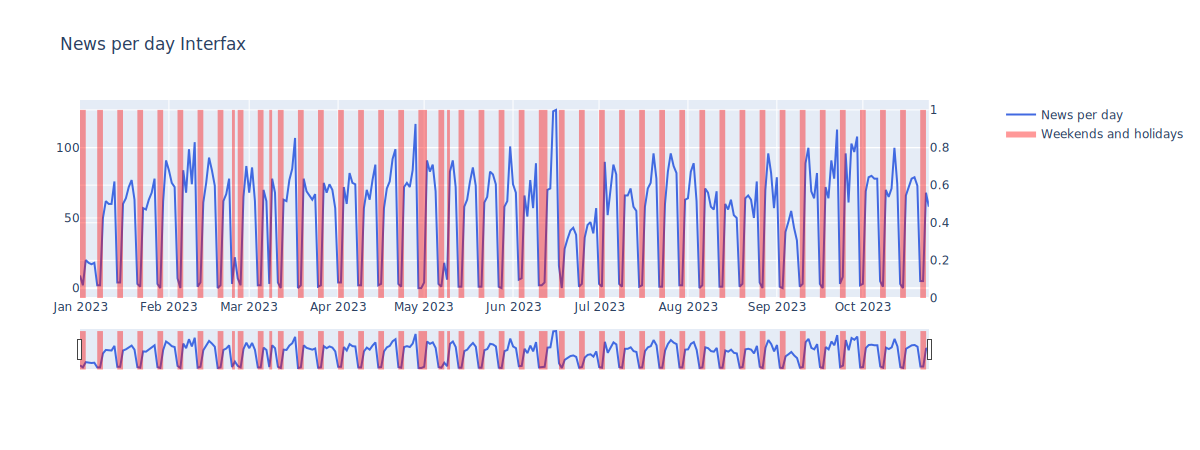

In [13]:
def plot_news(source:str):
    fig = go.Figure()
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(x=news_by_date.index, y=weekend,
                             fill = 'tonexty', fillcolor = 'rgba(255, 0, 0, 0.4)',
                             line_shape = 'hv', line_color = 'rgba(0,0,0,0)',
                             showlegend = True, name='Weekends and holidays'
                            ),
                row = 1, col = 1, secondary_y=True)

    fig.add_trace(
        go.Scatter(x = list(news_by_date.index), y=list(news_by_date.values), 
                   line_color='rgba(65,105,225,1)', name='News per day'))

    fig.update_layout(
        title = 'News per day {}'.format(source),
        width=1200,
        height=450,
        xaxis=dict(
            rangeselector=dict(),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        )
    )

    fig.show('svg')


plot_news('Interfax')

Большая часть падений количества новостей совпадает с выходными и праздничными днями, в которые биржа не работала. Среднее количество новостей примерно равно 75. Есть небольшой провал в количестве новостей в конце июня.

### РИА

In [14]:
df_ria = pd.read_csv('ria_parsed_data.csv', index_col=0)

In [15]:
def splitter(str):
    return str.split('\n')

In [16]:
dates_init = []
dates_upd = []
splited = df_ria.date.apply(splitter)
for i in splited:
    dates_init.append(i[0])
    try:
        dates_upd.append(i[1])
    except IndexError:
        dates_upd.append(None)

In [68]:
dates_upd = [i for i in dates_upd if i is not None]
dates_upd = [datetime.strptime(i[12:28], '%H:%M %d.%m.%Y') for i in dates_upd]

In [17]:
df_ria['datetime'] = np.zeros(len(df_ria))
for i in range(len(df_ria)):
    df_ria['datetime'][i] = datetime.strptime(dates_init[i], '%H:%M %d.%m.%Y')

C:\Users\maxod\AppData\Local\Temp\ipykernel_3232\566151837.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\maxod\AppData\Local\Temp\ipykernel_3232\566151837.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2023-01-01 23:38:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [18]:
dates = []
for i in range(len(df_ria)):
    dates.append(datetime.date(df_ria['datetime'][i]))
df_ria['date'] = dates

In [19]:
news_by_date = df_ria.groupby('date').date.count()
news_by_date = news_by_date.reindex(s, fill_value=0)

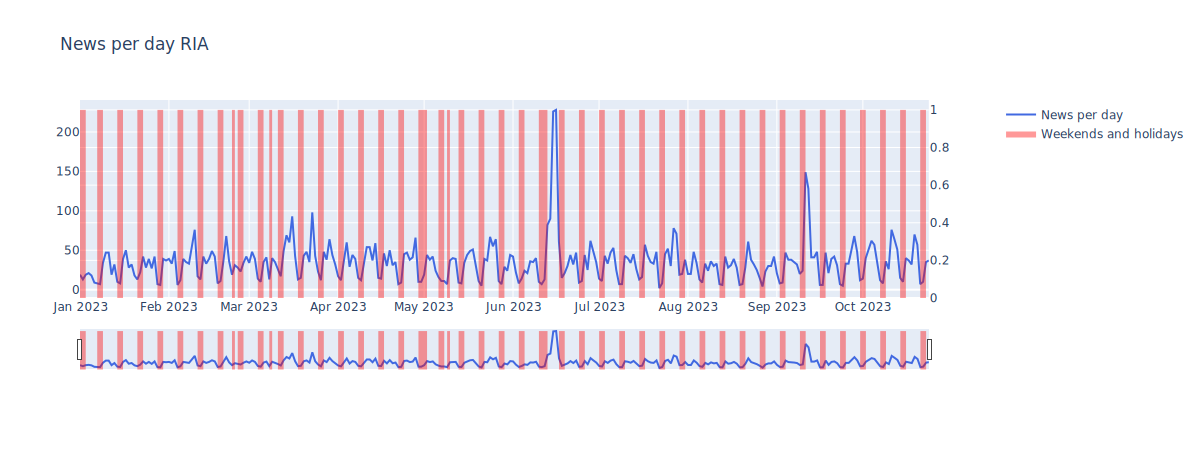

In [20]:
plot_news('RIA')

Большая часть падений количества новостей совпадает с выходными и праздничными днями, в которые биржа не работала. Среднее количество новостей примерно равно 50. Есть очень высокие пики в июне, когда проходил ПМЭФ, а также в сентябре, когда проходил ВЭФ.

### Смарт-лаб

In [21]:
df_smart_labs = pd.read_csv('smart_labs_parced_data.csv')

In [23]:
df_smart_labs = df_smart_labs.rename(columns={'key_words':'tags'})
df_smart_labs

,website,section,url,header,body,date,tags
0,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/867681.php,🔶IR Газпром: Алексей Миллер: В 2022 году «Газп...,Задача №1 для нас — надежное обеспечение газом...,"02 января 2023, 14:37","['Газпром', 'пресс релиз']"
1,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/867998.php,"📉Цена газа в Европе $726 / 1000м3, новый миним...","Причины падения цен на газ — теплая погода, вы...","04 января 2023, 18:08","['цена на газ', 'акции', 'Газпром', 'Новатэк']"
2,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/867997.php,UBS прогнозирует Brent по $110 к концу 2023 го...,UBS опубликовали обзор с прогнозами по сырьево...,"04 января 2023, 17:58","['нефть', 'прогноз 2023']"
3,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/867996.php,Суточная прокачка газа через Украину упала на ...,Газпром не сообщил о причинах снижения транзит...,"04 января 2023, 17:51","['Газпром', 'транзит газа', 'акции']"
4,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/868185.php,Минфин: средняя цена нефти Urals в декабре сос...,"Минфин России подсчитал, что средняя цена нефт...","05 января 2023, 18:34","['нефть', 'потолок цен на нефть', 'urals']"
...,...,...,...,...,...,...,...
12467,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/950857.php,Минфин США добивается роста издержек РФ по тра...,Исполняющий обязанности помощника министра фин...,"17 октября 2023, 07:39","['нефть', 'море', 'транспортировка нефти', 'мо..."
12468,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/950854.php,СД Газпрома 24 октября обсудит инвестиционной ...,Совет директоров «Газпрома» планирует на засед...,"17 октября 2023, 07:26","['углеродный след', 'бюджет', 'заседание', 'СД..."
12469,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/950852.php,Комитет ГД одобрил к II чтению расчет бюджетно...,Комитет Госдумы по бюджету и налогам рекомендо...,"17 октября 2023, 07:18","['нефть', 'Бюджетное правило', 'акции']"
12470,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/950851.php,В случае нового усиления давления на рубль мож...,"Старший стратег SberCIB Investment Research, И...","17 октября 2023, 07:08","['ставка', 'ключевая ставка', 'цб', 'прогноз 2..."


In [24]:
def datechanger(date):
    date = monthconvert(date)
    datetime_object = datetime.strptime(date, '%d %m %Y, %H:%M')
    return datetime_object

In [25]:
df_smart_labs['datetime'] = np.zeros(len(df_smart_labs))
for i in range(len(df_smart_labs)):
    df_smart_labs['datetime'][i] = datechanger(df_smart_labs['date'][i])

C:\Users\maxod\AppData\Local\Temp\ipykernel_3232\535893866.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\maxod\AppData\Local\Temp\ipykernel_3232\535893866.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2023-01-02 14:37:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [26]:
dates = []
for i in range(len(df_smart_labs)):
    dates.append(datetime.date(df_smart_labs['datetime'][i]))
df_smart_labs['date'] = dates

In [27]:
df_smart_labs

,website,section,url,header,body,date,tags,datetime
0,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/867681.php,🔶IR Газпром: Алексей Миллер: В 2022 году «Газп...,Задача №1 для нас — надежное обеспечение газом...,2023-01-02,"['Газпром', 'пресс релиз']",2023-01-02 14:37:00
1,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/867998.php,"📉Цена газа в Европе $726 / 1000м3, новый миним...","Причины падения цен на газ — теплая погода, вы...",2023-01-04,"['цена на газ', 'акции', 'Газпром', 'Новатэк']",2023-01-04 18:08:00
2,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/867997.php,UBS прогнозирует Brent по $110 к концу 2023 го...,UBS опубликовали обзор с прогнозами по сырьево...,2023-01-04,"['нефть', 'прогноз 2023']",2023-01-04 17:58:00
3,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/867996.php,Суточная прокачка газа через Украину упала на ...,Газпром не сообщил о причинах снижения транзит...,2023-01-04,"['Газпром', 'транзит газа', 'акции']",2023-01-04 17:51:00
4,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/868185.php,Минфин: средняя цена нефти Urals в декабре сос...,"Минфин России подсчитал, что средняя цена нефт...",2023-01-05,"['нефть', 'потолок цен на нефть', 'urals']",2023-01-05 18:34:00
...,...,...,...,...,...,...,...,...
12467,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/950857.php,Минфин США добивается роста издержек РФ по тра...,Исполняющий обязанности помощника министра фин...,2023-10-17,"['нефть', 'море', 'транспортировка нефти', 'мо...",2023-10-17 07:39:00
12468,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/950854.php,СД Газпрома 24 октября обсудит инвестиционной ...,Совет директоров «Газпрома» планирует на засед...,2023-10-17,"['углеродный след', 'бюджет', 'заседание', 'СД...",2023-10-17 07:26:00
12469,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/950852.php,Комитет ГД одобрил к II чтению расчет бюджетно...,Комитет Госдумы по бюджету и налогам рекомендо...,2023-10-17,"['нефть', 'Бюджетное правило', 'акции']",2023-10-17 07:18:00
12470,Smart_Lab,Новости компаний и новости по акциям,https://smart-lab.ru/blog/950851.php,В случае нового усиления давления на рубль мож...,"Старший стратег SberCIB Investment Research, И...",2023-10-17,"['ставка', 'ключевая ставка', 'цб', 'прогноз 2...",2023-10-17 07:08:00


In [28]:
news_by_date = df_smart_labs.groupby('date').date.count()
news_by_date = news_by_date.reindex(s, fill_value=0)

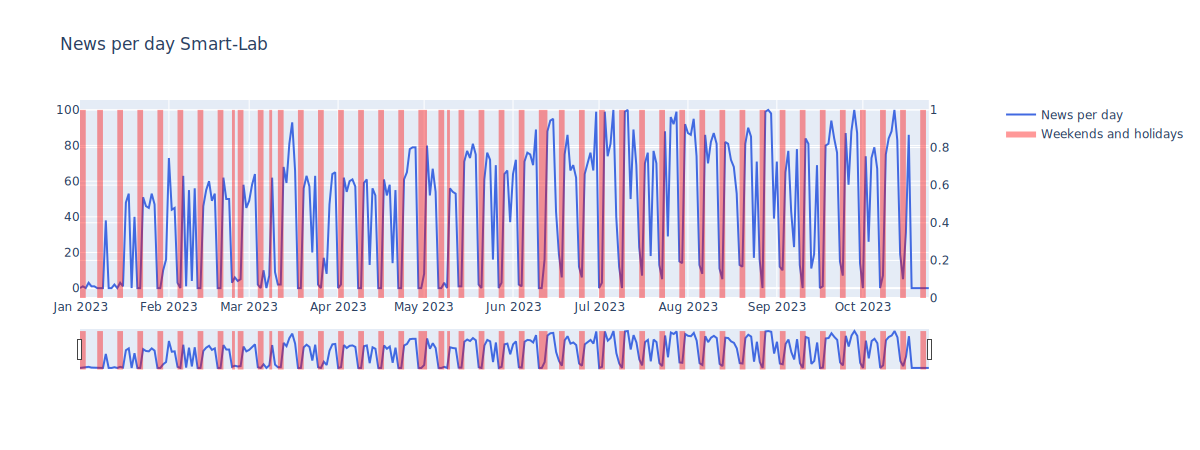

In [29]:
plot_news('Smart-Lab')

Большая часть падений количества новостей совпадает с выходными и праздничными днями, в которые биржа не работала. Среднее количество новостей примерно равно 70. Отклоняется от других источников тем, что есть много других провалов по количеству новостей. Возможная причина: характер самого портала, аггрегация новостей с лагами.

### Коммерсантъ

In [31]:
df_kommersant = pd.read_csv('kommersant_parced_data.csv')

In [32]:
df_kommersant = df_kommersant.rename(columns={'key_words':'tags'})
df_kommersant

,website,section,url,header,body,date,tags
0,Kommersant,Финансы,https://www.kommersant.ru/doc/6015937,Криптобиржа Binance сокращает сотрудников и те...,Криптовалютная биржа Binance начала сокращать ...,"02.06.2023, 12:13",[]
1,Kommersant,Финансы,https://www.kommersant.ru/doc/6123294,Депутат Аксаков спрогнозировал курс доллара СШ...,Глава комитета Госдумы по финансовому рынку Ан...,"24.07.2023, 19:10",[]
2,Kommersant,Фондовый рынок,https://www.kommersant.ru/doc/5915027,Иностранные бумаги не стерпели санкций,Объем торгов иностранными ценными бумагами на ...,"05.04.2023, 21:45",[]
3,Kommersant,Валютные прогнозы,https://www.kommersant.ru/doc/5774233,Курс доллара. Прогноз на 19-20 января,На текущей неделе доллар предпринял попытку ук...,"18.01.2023, 21:11",[]
4,Kommersant,Финансы,https://www.kommersant.ru/doc/6268215,Мосбиржа с февраля 2022 года потеряла 80% доли...,Доля акций в свободном обращении (free-float) ...,"12.10.2023, 10:39",[]
...,...,...,...,...,...,...,...
2475,Kommersant,Финансы,https://www.kommersant.ru/doc/6146791,Путин подписал закон об эксперименте с исламск...,Президент Владимир Путин подписал закон о пров...,"04.08.2023, 21:01",[]
2476,Kommersant,Финансы,https://www.kommersant.ru/doc/6095107,Bloomberg узнало о намерениях национализироват...,Агентство Bloomberg со ссылкой на собственные ...,"07.07.2023, 19:42",[]
2477,Kommersant,Валютные прогнозы,https://www.kommersant.ru/doc/5812566,Курс доллара. Прогноз на 9–10 февраля,Российский рубль стремительно теряет позиции п...,"08.02.2023, 21:00",[]
2478,Kommersant,Финансы,https://www.kommersant.ru/doc/5954802,Замминистра финансов России Моисеев назвал кри...,Заместитель министра финансов России Алексей М...,"27.04.2023, 15:27",[]


In [34]:
df_kommersant['tags'] = df_kommersant['tags'].replace('[]', np.NaN)

In [35]:
df_kommersant['datetime'] = np.zeros(len(df_kommersant))
for i in range(len(df_kommersant)):
    df_kommersant['datetime'][i] = datetime.strptime(df_kommersant['date'][i], '%d.%m.%Y, %H:%M')

C:\Users\maxod\AppData\Local\Temp\ipykernel_3232\2041172035.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\maxod\AppData\Local\Temp\ipykernel_3232\2041172035.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2023-06-02 12:13:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [36]:
dates = []
for i in range(len(df_kommersant)):
    dates.append(datetime.date(df_kommersant['datetime'][i]))
df_kommersant['date'] = dates

In [37]:
news_by_date = df_kommersant.groupby('date').date.count()
news_by_date = news_by_date.reindex(s, fill_value=0)

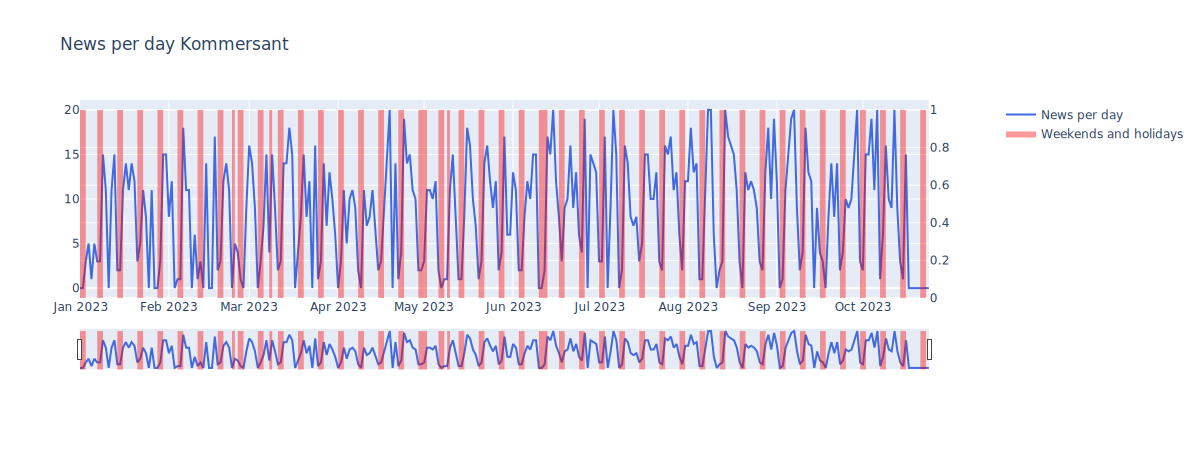

In [38]:
plot_news('Kommersant')

Большая часть падений количества новостей совпадает с выходными и праздничными днями, в которые биржа не работала. Среднее количество новостей примерно равно 12-13.

### Общий датасет

In [39]:
df_total = pd.concat([df_interfax, df_ria, df_smart_labs, df_kommersant], axis=0, ignore_index=True)

In [40]:
df_total

,website,section,url,header,body,date,tags,datetime
0,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879448,Банки РФ с 2023 года начнут выходить из регуля...,Москва. 1 января. INTERFAX.RU - Банк России с ...,2023-01-01,"['Россия', 'банки', 'послабления', 'отмена']",2023-01-01 07:03:00
1,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879447,Запрет на раскрытие информации для банков в РФ...,Москва. 1 января. INTERFAX.RU - Банк России пр...,2023-01-01,"['Россия', 'банки', 'отчетность', 'раскрытие']",2023-01-01 06:23:00
2,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879440,Расширен перечень налоговых льгот для резидент...,Москва. 1 января. INTERFAX.RU - Резиденты росс...,2023-01-01,"['Россия', 'налоги', 'ставки', 'САР']",2023-01-01 05:08:00
3,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879436,С 1 января будет взиматься пошлина при экспорт...,Москва. 1 января. INTERFAX.RU - Пошлина при эк...,2023-01-01,"['Россия', 'топливо', 'демпфер', 'пошлина']",2023-01-01 04:10:00
4,Интерфакс,В РОССИИ,https://www.interfax.ru/russia/879434,Пошлина на экспорт подсолнечного масла из РФ в...,На шрот - вырастет почти в 23 раза\nМосква. 1 ...,2023-01-01,"['Россия', 'экспорт', 'масло', 'пошлина']",2023-01-01 04:05:00
...,...,...,...,...,...,...,...,...
39771,Kommersant,Финансы,https://www.kommersant.ru/doc/6146791,Путин подписал закон об эксперименте с исламск...,Президент Владимир Путин подписал закон о пров...,2023-08-04,NaN,2023-08-04 21:01:00
39772,Kommersant,Финансы,https://www.kommersant.ru/doc/6095107,Bloomberg узнало о намерениях национализироват...,Агентство Bloomberg со ссылкой на собственные ...,2023-07-07,NaN,2023-07-07 19:42:00
39773,Kommersant,Валютные прогнозы,https://www.kommersant.ru/doc/5812566,Курс доллара. Прогноз на 9–10 февраля,Российский рубль стремительно теряет позиции п...,2023-02-08,NaN,2023-02-08 21:00:00
39774,Kommersant,Финансы,https://www.kommersant.ru/doc/5954802,Замминистра финансов России Моисеев назвал кри...,Заместитель министра финансов России Алексей М...,2023-04-27,NaN,2023-04-27 15:27:00


In [41]:
news_by_date = df_total.groupby('date').date.count()
news_by_date = news_by_date.reindex(s, fill_value=0)

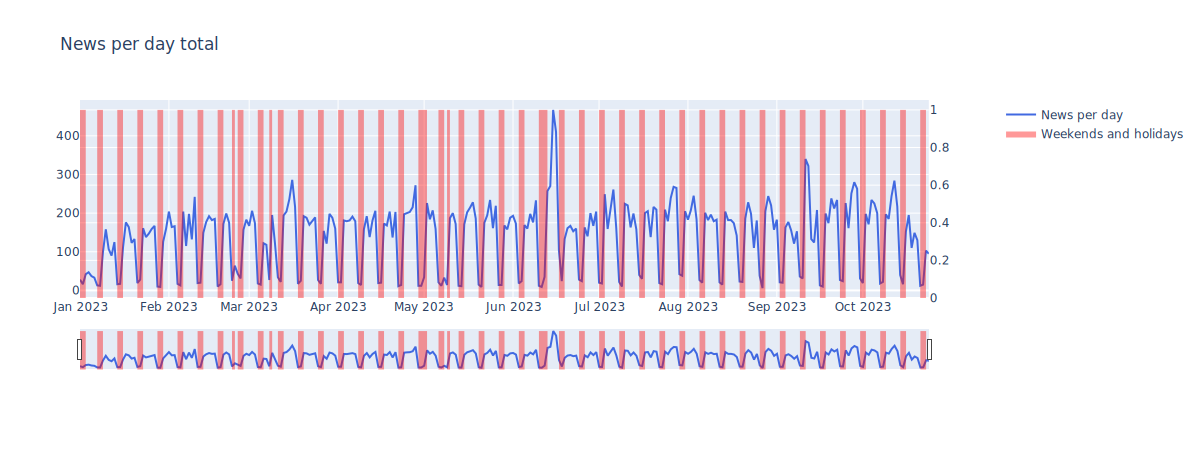

In [42]:
plot_news('total')

Общий график выглядит как смесь Интерфакса и РИА из-за количества новостей именно из этих изданий. На общей картине уменьшение количества новостей еще чаще совпадает с нерабочими для биржи днями.

In [52]:
ts_total = df_total.copy()

In [53]:
ts_total.index = ts_total['datetime']

    Оставим данные только для дат, которые доступны по всем изданиям.

    Исключим дни, в которые биржа не работала.

    Ограничимся новостями, влияние которых можно отследить, взяв новости только в промежутках с 9:30 утра до половины 12 вечером.

In [54]:
ts_total = ts_total[ts_total.index.weekday < 5].between_time('9:30', '23:30')
ts_total = ts_total[~(ts_total['date'].isin(pd.Series([datetime(2023, 1, 1), datetime(2023, 1, 2), datetime(2023, 1, 7), datetime(2023, 2, 23),
                                                                    datetime(2023, 3, 8), datetime(2023, 5, 1), datetime(2023, 5, 9),
                                                                    datetime(2023, 6, 12)]).dt.date.tolist()))]
ts_total = ts_total.sort_index().loc['2023-01-01' : '2023-10-17', :] 

In [55]:
news_by_date = ts_total.groupby('date').date.count()

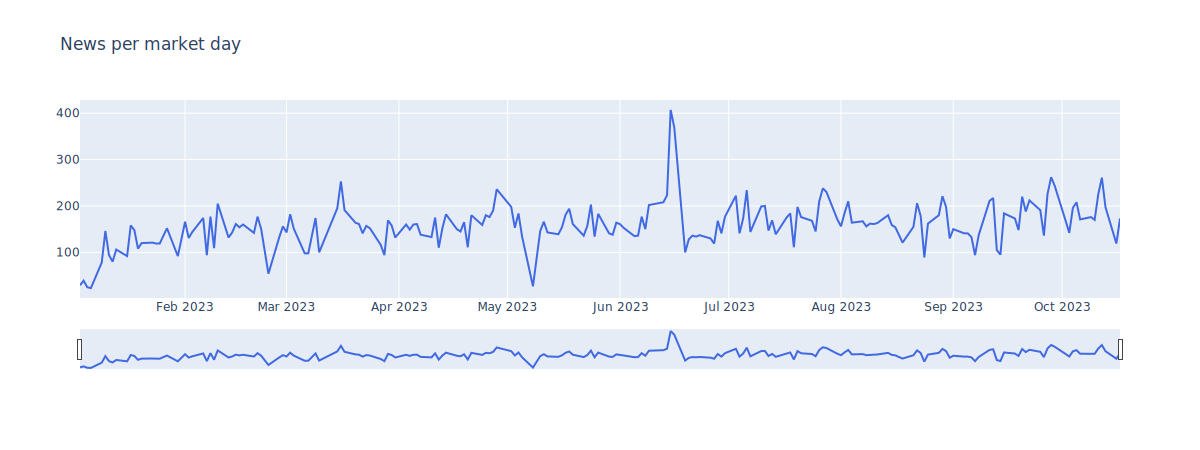

In [56]:
fig = go.Figure()
fig.add_trace(
        go.Scatter(x = list(news_by_date.index), y=list(news_by_date.values), 
                   line_color='rgba(65,105,225,1)', name='News per day', 
                   ))

fig.update_layout(
    title='News per market day',
    width=1200,
    height=450,
    xaxis=dict(
        rangeselector=dict(),
        rangeslider=dict(
            visible=True
        ),
        type="date"
        ))

fig.show('svg')

# Вывод:
    По временному ряду новостей видно, что количество новостей колеблется около среднего в примерно 160-170 новостей в день в дни, когда работает Московская биржа.

    Есть отдельные сильные провалы, связанные с выходными днями по общему календарю, однако биржа в этот день работала, поэтому мы не исключали эти даты. Это начало января, 24 февраля и 8 мая.

    Есть и очень насыщенный день 15 июня. Вероятно, это связано с проведением ПМЭФ.
    
    В целом, ряд выглядит относительно стационарным, сезонности и трендов после исключения выходных и праздников не наблюдается. 

# Тэги/ключевые слова

In [57]:
total_tags_key_words = list()
def list_enhancer(a):
    a = a.strip('][').split(', ')
    a = [i.replace("'", '') for i in a]
    a = [i.replace('"', '') for i in a]
    return a


for i in ts_total['tags']:
    if pd.notna(i):
        total_tags_key_words.extend(list_enhancer(i))

<Axes: title={'center': 'News with tags'}, xlabel='tags', ylabel='News'>

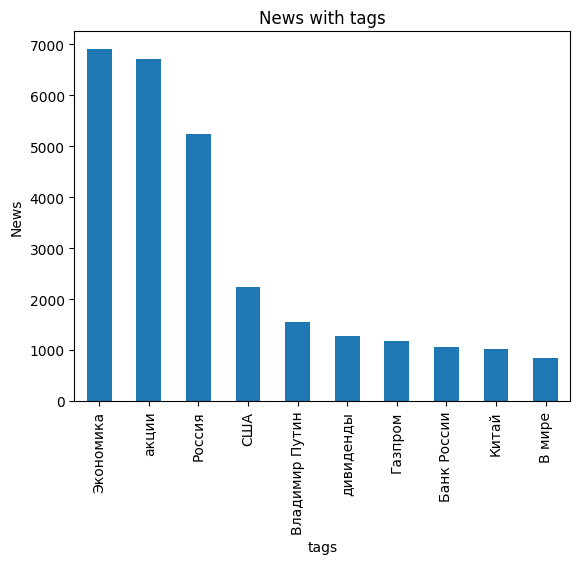

In [58]:
pd.Series(total_tags_key_words).value_counts().head(10).plot(kind='bar', title='News with tags', xlabel='tags', ylabel='News')

In [59]:
pd.Series(total_tags_key_words).value_counts().value_counts()

count
1       8917
2       1866
3        897
4        510
5        345
        ... 
165        1
164        1
160        1
158        1
6908       1
Name: count, Length: 209, dtype: int64

In [60]:
pd.Series(total_tags_key_words).value_counts()

Экономика         6908
акции             6717
Россия            5242
США               2233
Владимир Путин    1544
                  ... 
биотехи              1
Орел                 1
Marazzi Group        1
Керама Марацци       1
Бренды               1
Name: count, Length: 14531, dtype: int64

# Вывод:

    Большая часть ключевых слов встречается небольшое количество раз: от 1 до 3 раз встречаются 12000 тэгов и ключевых слов. 

    Скорее всего, редко встречаемые тэги не будут отражать никакие сущности, однако возможно среди них встречаются синонимы или части сущностей, которые отражены более встречающимися тэгами.

    На этапе обработки данных мы попробуем извлечь словарь сущностей.

    Наиболее встречающиеся ключевые слова тоже могут не являтся сущностями.

In [64]:
ts_total.index = pd.RangeIndex(len(ts_total.index))
ts_total = ts_total.drop('date', axis=1)

In [67]:
ts_total

,website,section,url,header,body,tags,datetime
0,РИА,Экономика,https://ria.ru/20230103/banki-1842907991.html,Эксперт рассказал о развитии исламского банкин...,"МОСКВА, 3 янв - РИА Новости. Порядка 10-15 фил...","['Экономика', 'Россия', 'Сбербанк России']",2023-01-03 10:16:00
1,РИА,Экономика,https://ria.ru/20230103/avtomobili-1842908567....,Минпромторг спрогнозировал рост производства а...,"МОСКВА, 3 янв - РИА Новости. Минпромторг прогн...","['Экономика', 'Авто', 'Денис Мантуров', 'Росси...",2023-01-03 10:20:00
2,Интерфакс,ЭКОНОМИКА,https://www.interfax.ru/business/879539,Рынок акций РФ открылся ростом индекса МосБирж...,Москва. 3 января. INTERFAX.RU - Рынок акций РФ...,['Московская биржа'],2023-01-03 10:22:00
3,РИА,Экономика,https://ria.ru/20230103/nissan-1842909188.html,"""АвтоВАЗу"" передадут активы Nissan в России","МОСКВА, 3 янв - РИА Новости. Подведомственное ...","['Экономика', 'Авто', 'Денис Мантуров', 'Минис...",2023-01-03 10:29:00
4,Интерфакс,ЭКОНОМИКА,https://www.interfax.ru/business/879540,Президент Бразилии отменил приватизацию госком...,Москва. 3 января. INTERFAX.RU - Новый президен...,"['Бразилия', 'Луис Инасиу Лула да Силва', 'Pet...",2023-01-03 10:31:00
...,...,...,...,...,...,...,...
31749,РИА,Экономика,https://ria.ru/20231017/finansirovanie-1903460...,Финансирование экспорта при санкциях обсудят н...,"МОСКВА, 17 окт - РИА Новости. Участники сессии...","['В России', 'Экономика', 'Россия', 'Форум ""Сд...",2023-10-17 21:05:00
31750,РИА,Экономика,https://ria.ru/20231017/brendy-1903461295.html,Стратегию развития российских брендов обсудят ...,"МОСКВА, 17 окт - РИА Новости. Что Россия может...","['В России', 'Экономика', 'Россия', 'Бренды', ...",2023-10-17 21:10:00
31751,РИА,Экономика,https://ria.ru/20231017/deklaratsiya-190346195...,Венгрия и Сербия в декларации назвали действия...,"БУДАПЕШТ, 17 окт - РИА Новости. Министр иностр...","['Сербия', 'Венгрия', 'Болгария', 'Николай Ден...",2023-10-17 21:14:00
31752,РИА,Краснодарский край,https://ria.ru/20231017/granty-1903465812.html,Кубань выделила 140 миллионов рублей на гранты...,"КРАСНОДАР, 17 окт - РИА Новости. Власти Красно...","['Краснодарский край', 'Экономика', 'Краснодар...",2023-10-17 21:45:00
